In [1]:
# project idea note
# https://docs.google.com/document/d/1_Tp3DhT_5sD2-RbuMpkKVjSKfcNsOQAvUdDc6ZCoJtc/edit?usp=sharing

# data 
# https://www.kaggle.com/valentinjoseph/avocado-sales-20152021-us-centric (no code)


#### Some relevant columns in the dataset:

Date - The date of the observation
averageprice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold  (The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table).
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline
import os

from library.sb_utils import save_file
import warnings
plt.rcParams['figure.figsize'] = (10, 7)
#plt.style.use('seaborn-colorblind')
sns.set_style('whitegrid')

In [3]:
df_ny = pd.read_csv('./data/df_ny.csv', index_col='Date', parse_dates=True);

#### Inspction of the dataframe

In [4]:
df_ny.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.93,17328.24,organic,2015,NewYork
2015-01-04,1.09,1402890.20,conventional,2015,NewYork


In [5]:
df_ny_org=df_ny[df_ny['type']=='organic']
df_ny_con=df_ny[df_ny['type']=='conventional']

# EDA for New_york 

In [6]:
df_ny.head(3)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.93,17328.24,organic,2015,NewYork
2015-01-04,1.09,1402890.20,conventional,2015,NewYork
2015-01-11,1.34,1018225.83,conventional,2015,NewYork


In [7]:
# What cities had the highest/lowest volume
df_ny.groupby(['type'])['TotalVolume'].sum().astype(int)

type
conventional    565686699
organic          27249836
Name: TotalVolume, dtype: int32

<AxesSubplot:ylabel='type,year'>

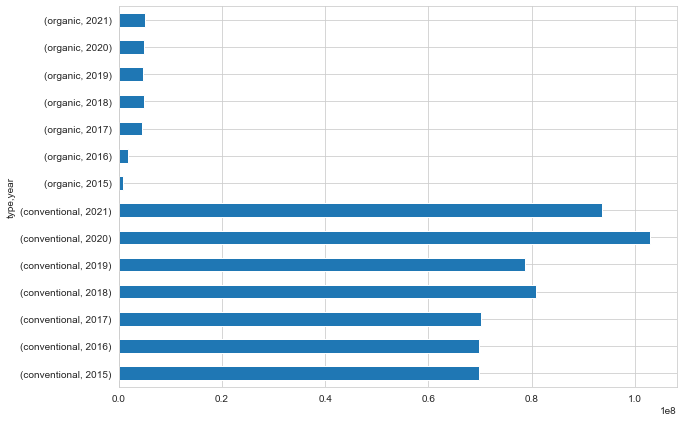

In [8]:
# What cities had the highest/lowest volume of organic avocado
df_ny.groupby(['type', 'year'])['TotalVolume'].sum().astype(int).plot(kind='barh')

In [9]:
df_ny.groupby(['type', 'year'])['TotalVolume'].sum().astype(int)

type          year
conventional  2015     69718104
              2016     69731496
              2017     70232226
              2018     80780668
              2019     78678771
              2020    102882685
              2021     93662748
organic       2015       889531
              2016      1815066
              2017      4618447
              2018      4943829
              2019      4820442
              2020      4983704
              2021      5178814
Name: TotalVolume, dtype: int32

organic         361
conventional    361
Name: type, dtype: int64


C:\Users\mirei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


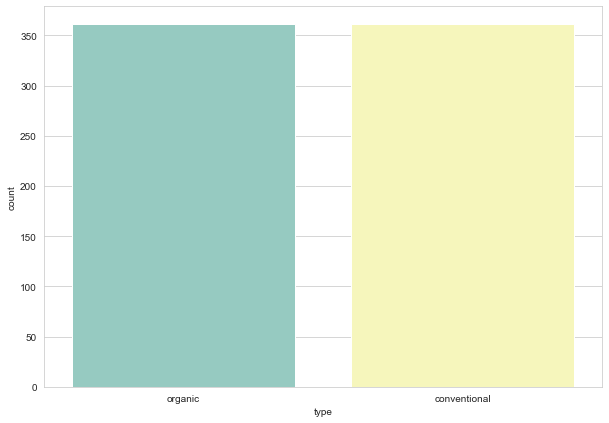

In [10]:
print(df_ny['type'].value_counts())
sns.countplot('type', data=df_ny, palette='Set3')

plt.show()

In [11]:
df1=df_ny.copy().reset_index()

In [12]:
# Ingeneral, the price drop from 2019 to 2021 (due to covid 19)

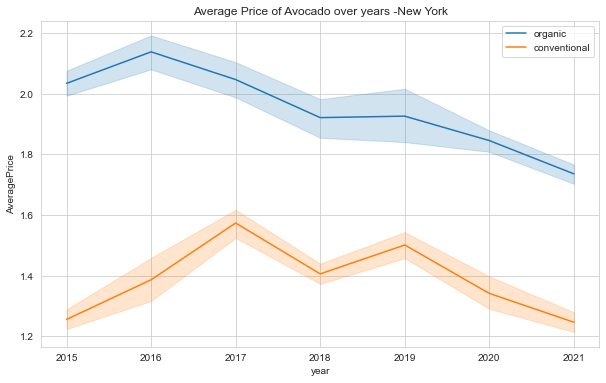

In [13]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="AveragePrice", hue="type")
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper right')
plt.title("Average Price of Avocado over years -New York")
plt.show()

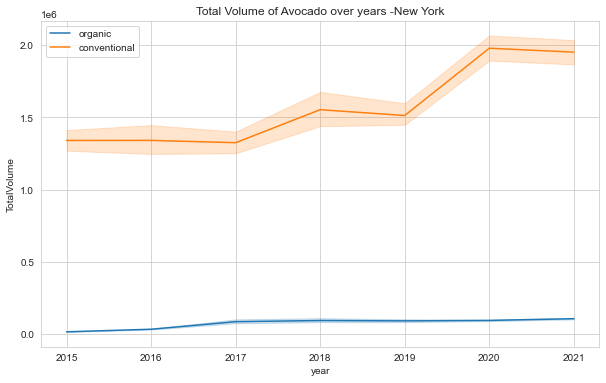

In [14]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="TotalVolume", hue="type")
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper left')
plt.title("Total Volume of Avocado over years -New York")
plt.show()

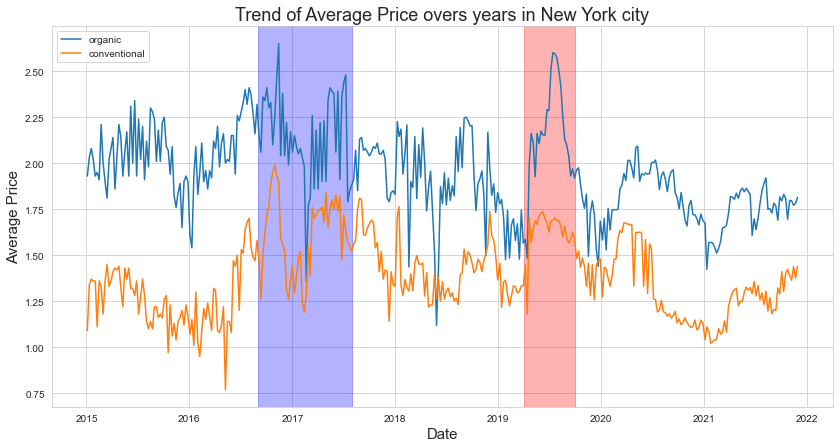

In [42]:
fig, ax = plt.subplots(figsize=(14,7))

sns.lineplot(data=df1, x="Date", y="AveragePrice", hue="type", ci=None)
ax.axvspan('2016-09-01', '2017-08-01', color ='blue', alpha=0.3)
ax.axvspan('2019-04-01', '2019-10-01', color ='red', alpha=0.3)
ax.legend(loc='upper left') # bbox_to_anchor=(1.05, 1)
ax.set_title('Trend of Average Price overs years in New York city',fontsize=18)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Avocado prices in New York')

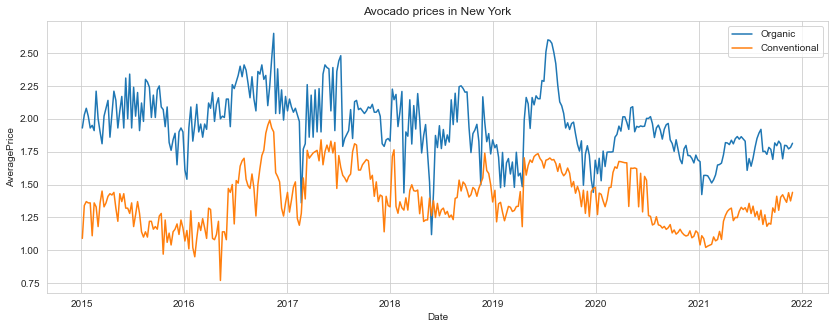

In [16]:
# plot Organic versus Conventional
plt.figure(figsize=(14,5))

sns.lineplot(data=df_ny_org["AveragePrice"],label="Organic")
sns.lineplot(data=df_ny_con["AveragePrice"],label="Conventional")

plt.xlabel("Date")
plt.title('Avocado prices in New York')

Text(0.5, 1.0, 'Avocado TotalVolume in New York')

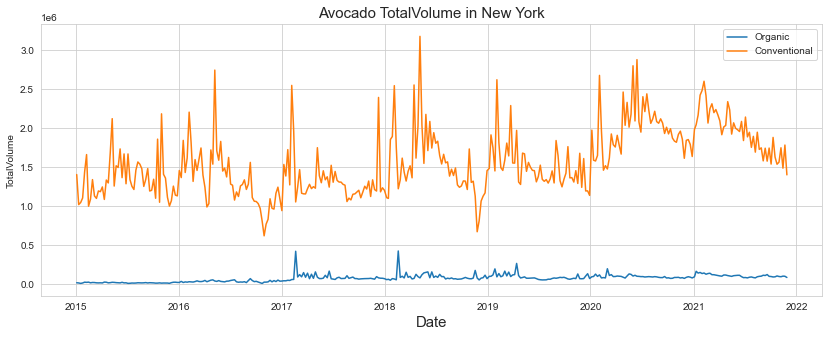

In [17]:
# plot Organic versus Conventional in Los Angeles
plt.figure(figsize=(14,5))

sns.lineplot(data=df_ny_org["TotalVolume"],label="Organic")
sns.lineplot(data=df_ny_con["TotalVolume"],label="Conventional")

plt.xlabel("Date",fontsize=15)
plt.title('Avocado TotalVolume in New York',fontsize=15)

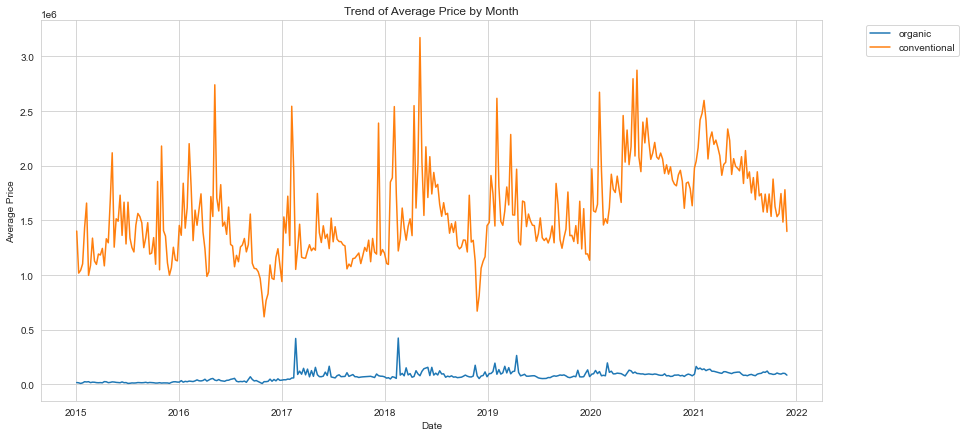

In [18]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Trend of Average Price by Month')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
sns.lineplot(data=df1, x="Date", y="TotalVolume", hue="type", ci=None)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

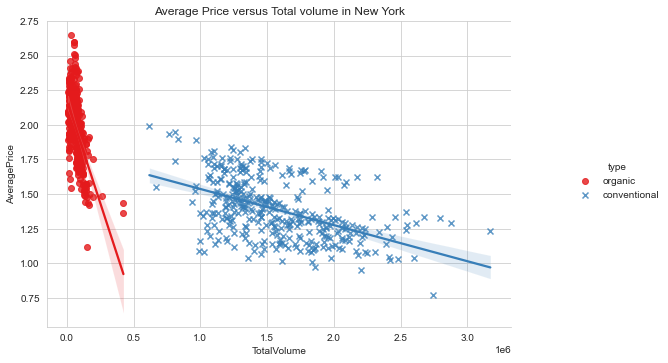

In [19]:
g= sns.lmplot(x="TotalVolume", y="AveragePrice", 
           data=df1, hue="type", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Average Price versus Total volume in New York')
plt.show()

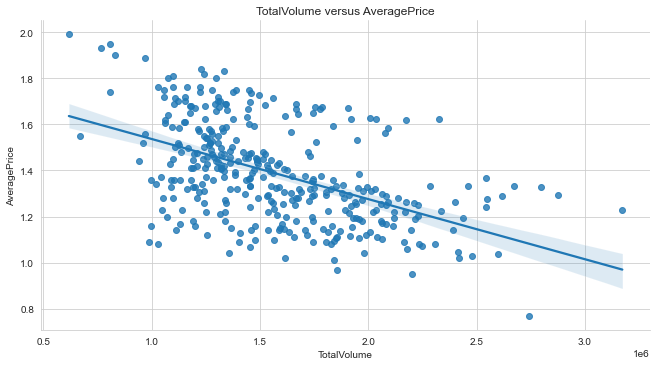

In [20]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_ny_con)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

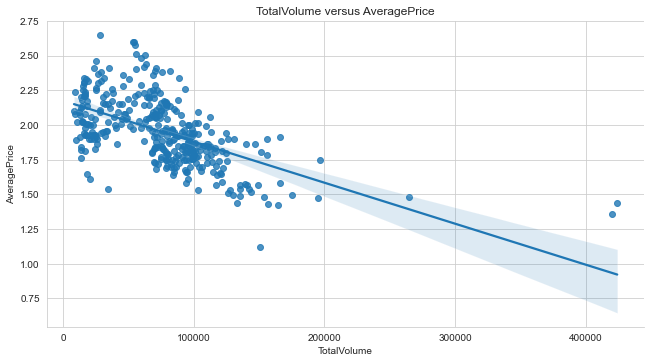

In [21]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_ny_org)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

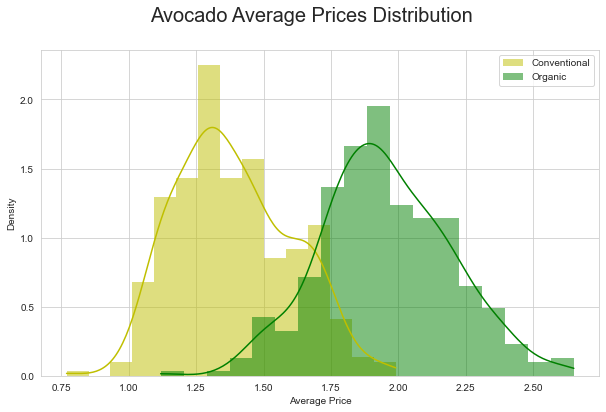

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Average Prices Distribution', fontsize = 20)
ax1 = sns.histplot(df1[df1['type']=='conventional']["AveragePrice"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(df1[df1['type']=='organic']["AveragePrice"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

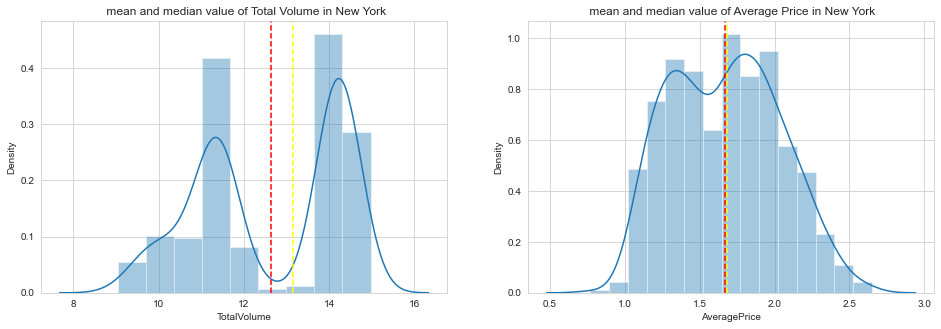

In [23]:
#  Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df1['TotalVolume']))
plt.axvline(np.log(df1['TotalVolume']).mean(), linestyle = '--', color = "red")
plt.axvline(np.log(df1['TotalVolume']).median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Total Volume in New York')
plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice'])
plt.axvline(df1['AveragePrice'].mean(), linestyle = '--', color = "red")
plt.axvline(df1['AveragePrice'].median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Average Price in New York')
plt.show()

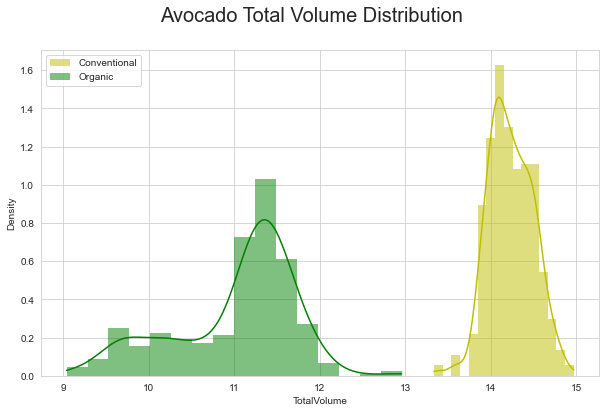

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Total Volume Distribution', fontsize = 20)
ax1 = sns.histplot(np.log(df1[df1['type']=='conventional']["TotalVolume"]),
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(np.log(df1[df1['type']=='organic']["TotalVolume"]),
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel("TotalVolume")
plt.legend(title_fontsize = 12)
plt.show()

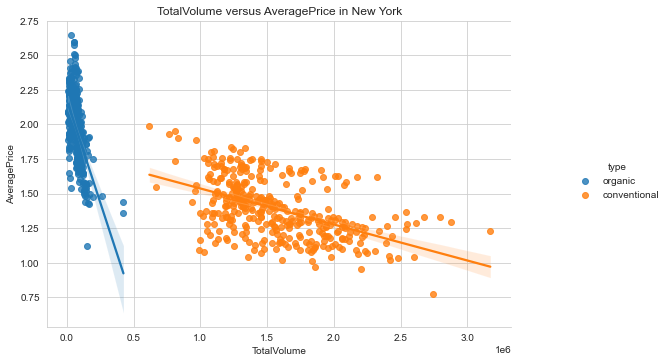

In [44]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df1, hue='type')
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice in New York')
plt.show()

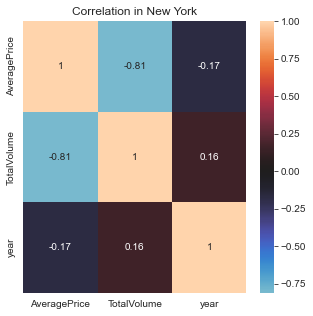

In [26]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ny.corr(), center=0, annot=True)
plt.title('Correlation in New York')
plt.show()

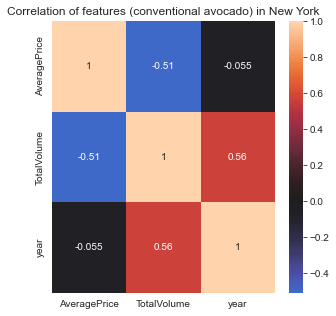

In [27]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ny_con.corr(), center=0, annot=True)
plt.title('Correlation of features (conventional avocado) in New York')
plt.show()

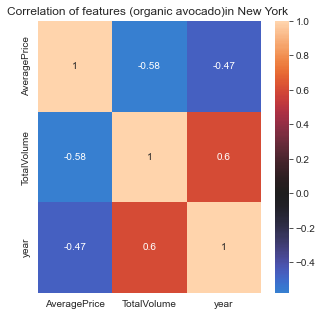

In [28]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_ny_org.corr(), center=0, annot=True)
plt.title('Correlation of features (organic avocado)in New York ')
plt.show()

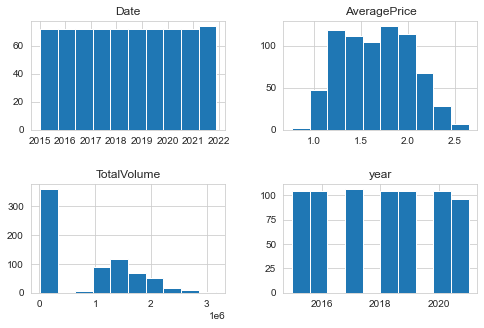

In [29]:
#view the distribution of data 
df1.hist(figsize=(8, 5) )
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

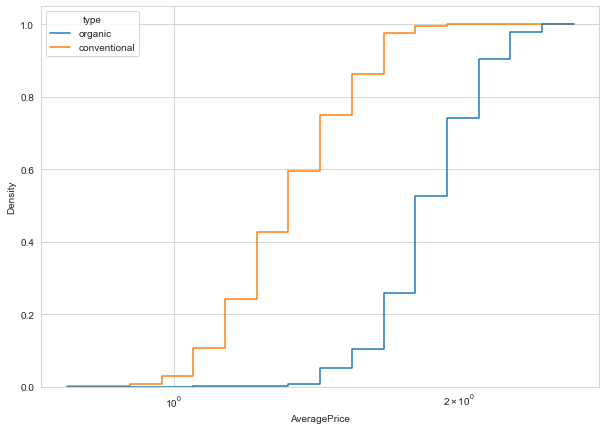

In [30]:
sns.histplot(
    data=df1, x="AveragePrice", hue="type",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [31]:
print(df_ny_org.describe()), print(df_ny_con.describe())

       AveragePrice    TotalVolume         year
count    361.000000     361.000000   361.000000
mean       1.952139   75484.312659  2017.963989
std        0.242008   47249.091053     1.986434
min        1.118666    8442.790000  2015.000000
25%        1.797560   40280.960000  2016.000000
50%        1.930763   75479.880000  2018.000000
75%        2.110000   97048.630000  2020.000000
max        2.650000  424186.840000  2021.000000
       AveragePrice   TotalVolume         year
count    361.000000  3.610000e+02   361.000000
mean       1.388822  1.566999e+06  2017.963989
std        0.212847  4.141753e+05     1.986434
min        0.770000  6.182798e+05  2015.000000
25%        1.230000  1.255553e+06  2016.000000
50%        1.360000  1.481997e+06  2018.000000
75%        1.540000  1.838475e+06  2020.000000
max        1.990000  3.172573e+06  2021.000000


(None, None)

In [43]:
datapath = './data'
df_ny_org.describe().to_excel("./data/describe_org_NY.xlsx")
df_ny_con.describe().to_excel("./data/describe_con_NY.xlsx")

In [32]:
# difference between price of org versus con 
df_ny_org.describe().loc['mean','AveragePrice'] - df_ny_con.describe().loc['mean','AveragePrice']

0.5633162247728534

In [33]:
# difference between volume of org versus con 
df_ny_org.describe().loc['mean','TotalVolume'] - df_ny_con.describe().loc['mean','TotalVolume']

-1491514.856204986

In [34]:
print(df_ny.describe())

       AveragePrice   TotalVolume         year
count    722.000000  7.220000e+02   722.000000
mean       1.670480  8.212417e+05  2017.963989
std        0.362360  8.023041e+05     1.985056
min        0.770000  8.442790e+03  2015.000000
25%        1.360000  7.555199e+04  2016.000000
50%        1.682463  5.212333e+05  2018.000000
75%        1.936582  1.481332e+06  2020.000000
max        2.650000  3.172573e+06  2021.000000


# outliers  for all Regions -df

Box plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

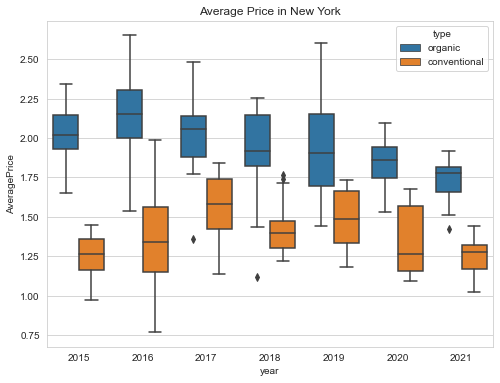

In [36]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','AveragePrice', hue = 'type', data = df_ny)
plt.title('Average Price in New York')
plt.show()

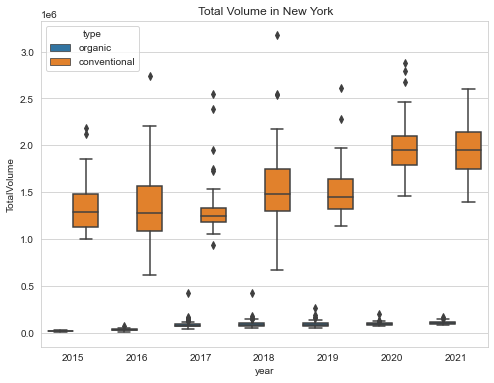

In [37]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','TotalVolume', hue = 'type', data = df_ny)
plt.title(' Total Volume in New York')
plt.show()

# visualizing_time_series

In [38]:
def visualizing_time_serie_tw(df):
    ax= df['AveragePrice'].resample('M').mean().plot(linewidth=2, fontsize=8,color='blue' );
    ax2 = ax.twinx()
    ax2=df['TotalVolume'].resample('M').mean().plot(linewidth=2, fontsize=8,color='red' );
    ax.set_ylabel('Average Price', fontsize=10)
    ax2.set_ylabel('Total Volume', fontsize=10)
    ax.set_title('Average Price and Total Volume - New York', fontsize=12)
    plt.legend()
    plt.show()
    return ax

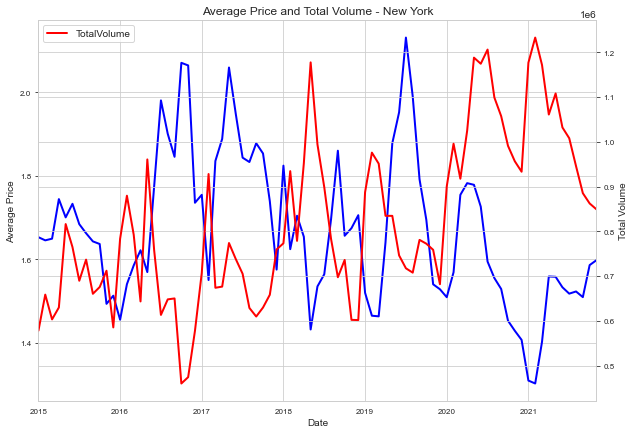

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [39]:
visualizing_time_serie_tw(df_ny)

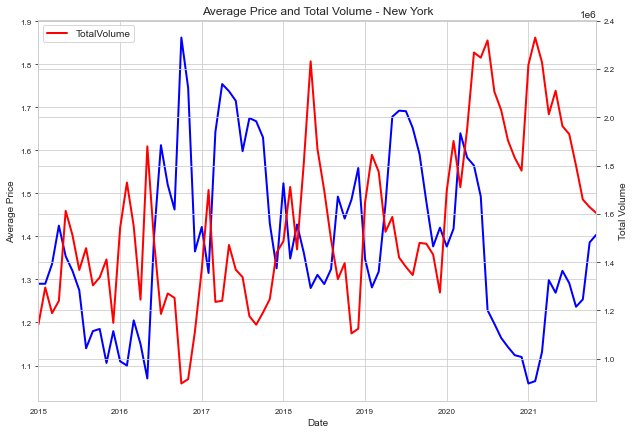

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [40]:
visualizing_time_serie_tw(df_ny_con)

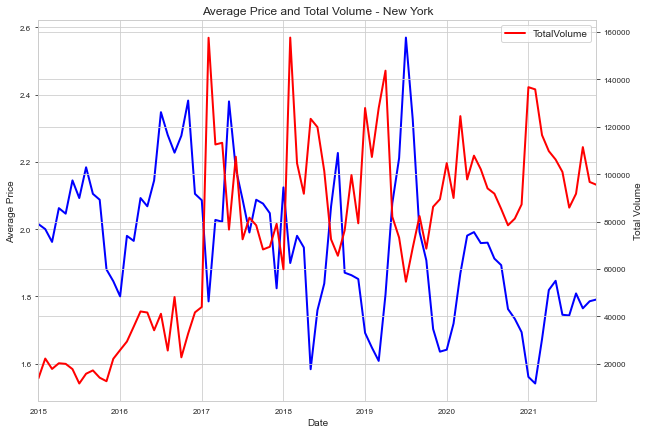

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [41]:
visualizing_time_serie_tw(df_ny_org)